In [9]:
using LinearAlgebra;
using IterativeSolvers;
using Plots;

$$\large \frac{\|e_n\|_A}{\|e_0\|_A} \leq 2 \left( \frac{\sqrt{\kappa} - 1}{\sqrt{\kappa} + 1}\right)^n$$

$$\large 2 \times 2^{-10} \leq 2 \left( \frac{\sqrt{\kappa} - 1}{\sqrt{\kappa} + 1}\right)^{10}$$

$$\Rightarrow \frac{1}{2} \leq \frac{\sqrt{\kappa} - 1}{\sqrt{\kappa}+1}$$

$$\Rightarrow \sqrt{\kappa} + 1 \leq 2(\sqrt{\kappa} - 1) = 2\sqrt{\kappa} - 2$$

$$\Rightarrow 3 \leq \sqrt{\kappa} \Rightarrow 9 \leq \kappa$$

What about $\|e_{20}\|_A$?

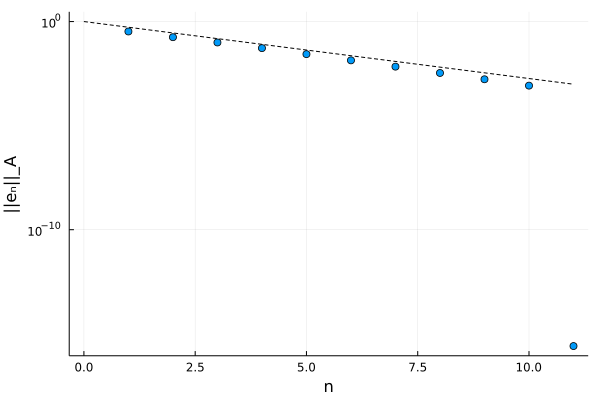

In [13]:
m = 11
Λ = cos.(LinRange(0,π,m)) * 4 .+ 5;
Q = qr(randn(m,m)).Q;
A = Q * Diagonal(Λ) * Q';
A = 0.5 * (A + A');
x_sol = Q * ones(m);
x_sol /= sqrt(x_sol' * A * x_sol);
b = A * x_sol;
x_n = [cg(A, b; reltol=0.0, maxiter=n) for n in 1:m];
e_norms = [sqrt((x - x_sol)' * A * (x - x_sol)) for x in x_n];
plot(1:m, e_norms, st=:scatter, yscale=:log10, xlabel="n", ylabel = "||eₙ||_A", legend=false)
plot!([0, m], [1, 2.0^(1-m)], l=(:dash, :black))

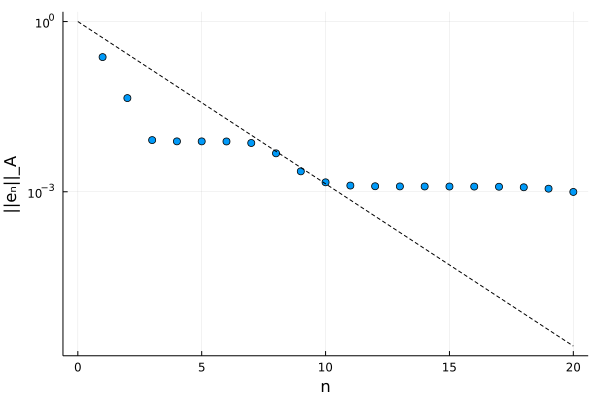

In [38]:
m = 1000;
Λ = cos.(LinRange(0,π,m)) * 4 .+ 5;
α = Λ[end-9] / Λ[end]
Λ = (Λ .- 1) * 1 / (α - 1) .+ 1;
Q = qr(randn(m,m)).Q;
A = Q * Diagonal(Λ) * Q';
A = 0.5 * (A + A');
y = ones(m);
y[1:end-10] .= eps();
x_sol = Q * y;
x_sol /= sqrt(x_sol' * A * x_sol);
b = A * x_sol;
x_n = [cg(A, b; reltol=0.0, maxiter=n) for n in 1:20];
e_norms = [sqrt((x - x_sol)' * A * (x - x_sol)) for x in x_n];
plot(1:20, e_norms[1:20], st=:scatter, yscale=:log10, xlabel="n", ylabel = "||eₙ||_A", legend=false)
plot!([0, 20], [1, 2.0^(1-20)], l=(:dash, :black))

The best bound we can give in the general case is

$$\|e_{20}\|_A \leq \|e_{10}\|_A.$$